# Introduction
I tried some classification models on this data, I hope you enjoy it! :)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
data=pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


It looks like there is no missing data, that's good.

In [5]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

The data is not big but it is balanced.

In [6]:
x_data=data.drop(["target"], axis=1)
x=((x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))).values
y=data.target.values

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

# Logistic Regression Classification

In [8]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)
print("Logistic Regression Accuracy:", 100*lr.score(x_test, y_test), "%")

Logistic Regression Accuracy: 85.24590163934425 %


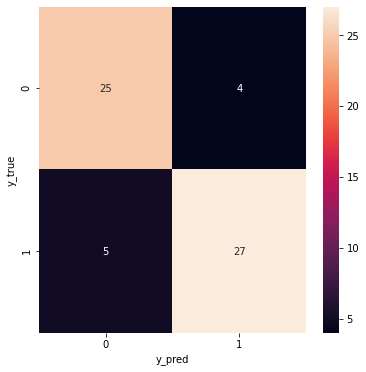

In [9]:
from sklearn.metrics import confusion_matrix
y_true=y_test
y_pred=lr.predict(x_test)
cmlr=confusion_matrix(y_true, y_pred)
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmlr, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

It cannot be considered successful but the prediction is balanced.

# KNN Classification

In [10]:
from sklearn.neighbors import KNeighborsClassifier
score_list=[]
for each in range(1,30):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train, y_train)
    score_list.append(100*knn2.score(x_test, y_test))
    print("n=", each, "Accuracy:", 100*knn2.score(x_test, y_test), "%")

n= 1 Accuracy: 80.32786885245902 %
n= 2 Accuracy: 73.77049180327869 %
n= 3 Accuracy: 83.60655737704919 %
n= 4 Accuracy: 77.04918032786885 %
n= 5 Accuracy: 81.9672131147541 %
n= 6 Accuracy: 81.9672131147541 %
n= 7 Accuracy: 81.9672131147541 %
n= 8 Accuracy: 80.32786885245902 %
n= 9 Accuracy: 81.9672131147541 %
n= 10 Accuracy: 81.9672131147541 %
n= 11 Accuracy: 81.9672131147541 %
n= 12 Accuracy: 83.60655737704919 %
n= 13 Accuracy: 80.32786885245902 %
n= 14 Accuracy: 81.9672131147541 %
n= 15 Accuracy: 81.9672131147541 %
n= 16 Accuracy: 83.60655737704919 %
n= 17 Accuracy: 83.60655737704919 %
n= 18 Accuracy: 85.24590163934425 %
n= 19 Accuracy: 81.9672131147541 %
n= 20 Accuracy: 83.60655737704919 %
n= 21 Accuracy: 83.60655737704919 %
n= 22 Accuracy: 83.60655737704919 %
n= 23 Accuracy: 83.60655737704919 %
n= 24 Accuracy: 85.24590163934425 %
n= 25 Accuracy: 81.9672131147541 %
n= 26 Accuracy: 81.9672131147541 %
n= 27 Accuracy: 81.9672131147541 %
n= 28 Accuracy: 81.9672131147541 %
n= 29 Accuracy

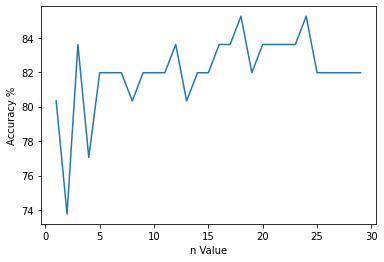

In [11]:
plt.plot([*range(1,30)], score_list)
plt.xlabel("n Value")
plt.ylabel("Accuracy %")
plt.show()

In [12]:
optimal_n_value=score_list.index(max(score_list))+1
knn=KNeighborsClassifier(n_neighbors=optimal_n_value)
knn.fit(x_train, y_train)
print("KNN Prediction Accuracy:", 100*knn.score(x_test, y_test), "%")

KNN Prediction Accuracy: 85.24590163934425 %


In [13]:
from sklearn.metrics import confusion_matrix
y_true=y_test
y_pred=knn.predict(x_test)
cmknn=confusion_matrix(y_true, y_pred)

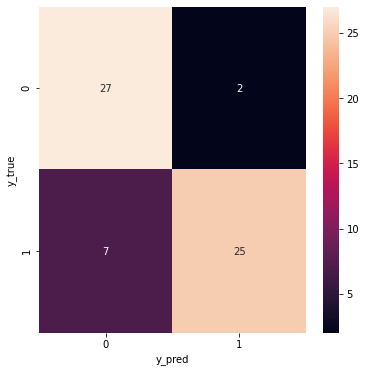

In [14]:
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmknn, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

It is balanced, the reason of the lack of the success of these models is the amount of data which is very low for a machine learning model.

# SVM Classification

In [15]:
from sklearn.svm import SVC
svm=SVC(random_state=42)
svm.fit(x_train, y_train)
print("SVM Prediction Accuracy:", 100*svm.score(x_test, y_test), "%")

SVM Prediction Accuracy: 83.60655737704919 %


In [16]:
y_true=y_test
y_pred=svm.predict(x_test)
cmsvm=confusion_matrix(y_true, y_pred)

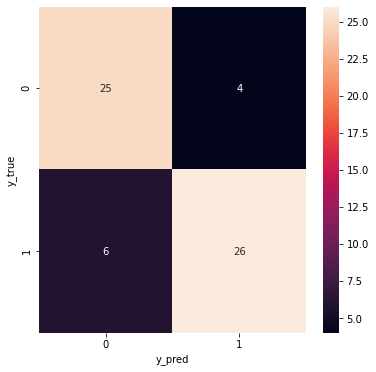

In [17]:
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmsvm, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Again, it is not successful because of the same problems.

# Naive Bayes Classification

In [18]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train, y_train)
print("Naive Bayes Prediction Accuracy:", 100*nb.score(x_test, y_test), "%")

Naive Bayes Prediction Accuracy: 86.88524590163934 %


In [19]:
y_true=y_test
y_pred=nb.predict(x_test)
cmnb=confusion_matrix(y_true, y_pred)

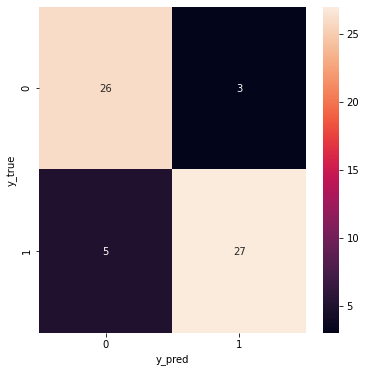

In [20]:
f,ax=plt.subplots(figsize=(6,6))
sns.heatmap(cmnb, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

This one is a little better than the other models.

# Decision Trees Classification

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
print("Decision Trees Prediction Accuracy:", 100*dt.score(x_test, y_test), "%")

Decision Trees Prediction Accuracy: 81.9672131147541 %


In [22]:
y_true=y_test
y_pred=dt.predict(x_test)
cmdt=confusion_matrix(y_true, y_pred)

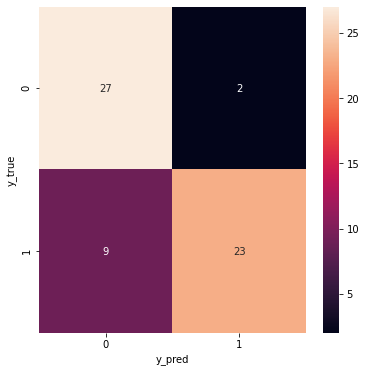

In [23]:
f,ax= plt.subplots(figsize=(6,6))
sns.heatmap(cmdt, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

This model is not successful either.

# Random Forest Classification

n_estimators= 1 --> Accuracy: 75.40983606557377 %
n_estimators= 2 --> Accuracy: 77.04918032786885 %
n_estimators= 3 --> Accuracy: 78.68852459016394 %
n_estimators= 4 --> Accuracy: 72.1311475409836 %
n_estimators= 5 --> Accuracy: 78.68852459016394 %
n_estimators= 6 --> Accuracy: 80.32786885245902 %
n_estimators= 7 --> Accuracy: 83.60655737704919 %
n_estimators= 8 --> Accuracy: 83.60655737704919 %
n_estimators= 9 --> Accuracy: 83.60655737704919 %
n_estimators= 10 --> Accuracy: 85.24590163934425 %
n_estimators= 11 --> Accuracy: 85.24590163934425 %
n_estimators= 12 --> Accuracy: 85.24590163934425 %
n_estimators= 13 --> Accuracy: 85.24590163934425 %
n_estimators= 14 --> Accuracy: 83.60655737704919 %
n_estimators= 15 --> Accuracy: 85.24590163934425 %
n_estimators= 16 --> Accuracy: 85.24590163934425 %
n_estimators= 17 --> Accuracy: 85.24590163934425 %
n_estimators= 18 --> Accuracy: 85.24590163934425 %
n_estimators= 19 --> Accuracy: 85.24590163934425 %
n_estimators= 20 --> Accuracy: 83.6065573

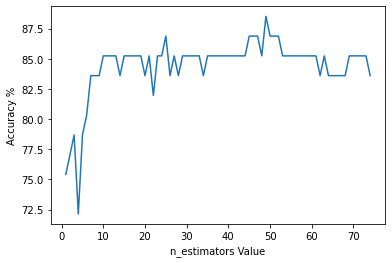

In [24]:
from sklearn.ensemble import RandomForestClassifier
score_list=[]
for each in range(1,75):
    rf2=RandomForestClassifier(n_estimators=each, random_state=42)
    rf2.fit(x_train, y_train)
    score_list.append(100*rf2.score(x_test, y_test))
    print("n_estimators=", each, "--> Accuracy:", 100*rf2.score(x_test, y_test), "%")

plt.plot([*range(1,75)], score_list)
plt.xlabel("n_estimators Value")
plt.ylabel("Accuracy %")
plt.show()

In [25]:
optimal_n_estimators_value=score_list.index(max(score_list))+1
rf=RandomForestClassifier(n_estimators=optimal_n_estimators_value, random_state=42)
rf.fit(x_train, y_train)
print("Random Forest Prediction Accuracy:", 100*rf.score(x_test, y_test), "%")

Random Forest Prediction Accuracy: 88.52459016393442 %


In [26]:
y_true=y_test
y_pred=rf.predict(x_test)
cmrf=confusion_matrix(y_true, y_pred)

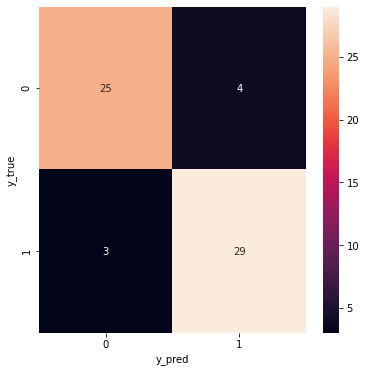

In [27]:
f,ax= plt.subplots(figsize=(6,6))
sns.heatmap(cmrf, annot=True)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

This model can be considered successful.

# Conclusion

In [28]:
print("Logistic Regression Accuracy:", 100*lr.score(x_test, y_test), "%")
print("KNN Prediction Accuracy:", 100*knn.score(x_test, y_test), "%")
print("SVM Prediction Accuracy:", 100*svm.score(x_test, y_test), "%")
print("Naive Bayes Prediction Accuracy:", 100*nb.score(x_test, y_test), "%")
print("Decision Trees Prediction Accuracy:", 100*dt.score(x_test, y_test), "%")
print("Random Forest Prediction Accuracy:", 100*rf.score(x_test, y_test), "%")

Logistic Regression Accuracy: 85.24590163934425 %
KNN Prediction Accuracy: 85.24590163934425 %
SVM Prediction Accuracy: 83.60655737704919 %
Naive Bayes Prediction Accuracy: 86.88524590163934 %
Decision Trees Prediction Accuracy: 81.9672131147541 %
Random Forest Prediction Accuracy: 88.52459016393442 %


It is seen that random forest classification model is the best prediction model for this data.